Начало второй недели на курсе от Яндекса и МФТИ 


In [1]:
import pandas as pd 

In [3]:
frame = pd.DataFrame({'numbers':range(10), 'chars':['a']*10})

In [194]:
frame = pd.read_csv('../Week_2/dataset.tsv', sep='\t')

In [199]:
#new_line = {'Name':'Mikhail', 'Birth':'16.12.1122', 'City':'Москва'}
#frame.append(new_line, ignore_index=True)

In [17]:
frame['IsStudent'] = ['False']*3+['True']*3

In [23]:
frame.drop(['City'], axis=1)

,Name,Birth,Position,IsStudent
0,Иванов А.А.,22.03.1980,NaN,False
1,Сорокин И.В.,07.08.1965,инженер,False
2,Белов М.М.,13.02.1980,менеджер,False
3,Мельникова Д.С.,15.04.1985,NaN,True
4,Рыбина Е.П.,19.11.1985,инженер,True
5,Костров С.О.,31.05.1985,стажер,True


Видео номер 2 

In [25]:
dataframe = pd.read_csv('./_695ed9480a9fdd7a41d21458bd8b3890_data_sample_example.tsv', sep='\t', header=0)

In [27]:
dataframe.dtypes

Name        object
Birth       object
City        object
Position    object
dtype: object

In [29]:
dataframe.Birth = dataframe.Birth.apply(pd.to_datetime)

In [33]:
dataframe.fillna('разнорабочий', inplace=True)

In [51]:
from datetime import datetime 

In [67]:
dataframe[(dataframe.Birth > datetime(1985,1,1))&(dataframe.City != dataframe.iloc[1,2])]

,Name,Birth,City,Position
3,Мельникова Д.С.,1985-04-15,Ростов,разнорабочий
4,Рыбина Е.П.,1985-11-19,Москва,инженер
5,Костров С.О.,1985-05-31,Москва,стажер


In [70]:
print(dataframe.shape)
print(dataframe.size)

(6, 4)
24


In [58]:
dataframe[(dataframe.Birth > datetime(1985,1,1)) | (dataframe.City !='Москва')]

,Name,Birth,City,Position
1,Сорокин И.В.,1965-07-08,Волгоград,инженер
2,Белов М.М.,1980-02-13,Ростов,менеджер
3,Мельникова Д.С.,1985-04-15,Ростов,разнорабочий
4,Рыбина Е.П.,1985-11-19,Москва,инженер
5,Костров С.О.,1985-05-31,Москва,стажер


In [85]:
student_dataframe = pd.DataFrame({'Name':['Zaycev', 'Korolev'], 'Birth':['1985.12.12', '1985.23.12']})

In [81]:
student_dataframe.drop(['IsStudent'], axis=1, inplace=True)

### First meeting with `Numpy`, `SciPy`

In [90]:
import numpy as np

In [124]:
from scipy import optimize

In [125]:
def f(x):
    return (x[0]-3.2)**2+(x[1]-0.1)**2+3

In [126]:
print(f([4.0,3.0]))

12.05


In [127]:
x_min= optimize.minimize(f, [5,5])

In [128]:
x_min

      fun: 3.0000000000011435
 hess_inv: array([[ 0.94055055, -0.16183475],
       [-0.16183475,  0.55944947]])
      jac: array([-2.05636024e-06,  5.36441803e-07])
  message: 'Optimization terminated successfully.'
     nfev: 16
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([3.19999896, 0.10000026])

In [129]:
print(x_min.x)

[3.19999896 0.10000026]


In [130]:
from scipy import linalg

In [132]:
a = np.array([[3,2,0],[1,-1,0],[0,5,1]])
b=np.array([2,4,-1])

In [134]:
solution = linalg.solve(a,b)

In [135]:
print(solution)

[ 2. -2.  9.]


In [137]:
np.dot(a, solution)

array([ 2.,  4., -1.])

In [138]:
X = np.random.rand(4,3)

In [140]:
U, D, V = linalg.svd(X)

In [143]:
print(U.shape, D.shape, V.shape)

print(type(U), type(D), type(V))


(4, 4) (3,) (3, 3)
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [154]:
from matplotlib import pyplot as plt
%matplotlib inline

from scipy import interpolate

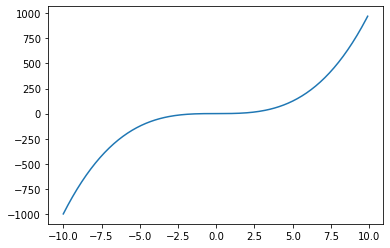

In [153]:
X = np.arange(-10,10,0.1)
Y = X **3
plt.plot(X,Y)
plt.show()

In [182]:
X = np.arange(0,10,2)
Y = np.exp(-X/3.0) + np.random.rand(len(X))*3

print(X[:5])
print(Y[:5])

[0 2 4 6 8]
[3.08925256 1.39236018 0.90329119 1.18982546 0.44091444]


In [183]:
f = interpolate.interp1d(X, Y, kind='quadratic')

x_new = np.arange(0,8,0.1)
y_new = f(x_new)

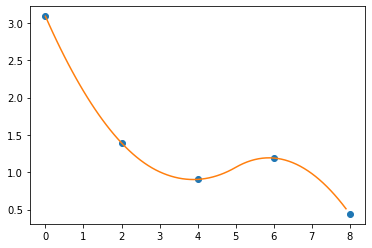

In [184]:
plt.plot(X,Y,'o', x_new, y_new, '-')
plt.show()

## Optimization problem with SciPy

In [200]:
from scipy import optimize

In [202]:
def f(x):
    return 0.5*(1-x[0])**2+(x[1]-x[0]**2)**2

print(f([1,1]))

0.0


In [214]:
x_min = optimize.brute(f,((-5,5),(-5,5)))
print(x_min)

[0.99999324 1.00001283]


In [215]:
x_min = optimize.differential_evolution(f,((-5,5),(-5,5)))

In [216]:
print(x_min)

     fun: 7.395570986446986e-32
 message: 'Optimization terminated successfully.'
    nfev: 3423
     nit: 113
 success: True
       x: array([1., 1.])


In [217]:
def q(x):
    return np.array((-2.*0.5*(1-x[0]) - 4*x[0]*(x[1]-x[0]**2), 2*(x[1] - x[0]**2)))

In [218]:
print(optimize.check_grad(f, q, [2,2]))

2.384185791015625e-07


In [219]:
print(optimize.fmin_bfgs(f, [2,2], fprime=q))

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
[1.00000582 1.00001285]


In [220]:
print(optimize.minimize(f, [2,2]))

      fun: 1.78380307372662e-11
 hess_inv: array([[0.95489061, 1.90006631],
       [1.90006631, 4.27872379]])
      jac: array([9.88094725e-07, 2.41748897e-06])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 8
     njev: 9
   status: 0
  success: True
        x: array([1.00000573, 1.00001265])


In [223]:
def g(x):
    return -f(x)
    
print(optimize.minimize(g, [1,1]))

      fun: -0.0
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([-6.70552263e-08, -1.49011612e-08])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([1., 1.])
